# Clustering the mtcars data set with Unsupervised Learning Techniques

Data Set
Preprocessing
Clustering
K-Means
No feature-scaling
Zero-to-one scaling
Standard scaling
PCA-transformed


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

%matplotlib inline

# Data Set

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [3]:
df_fet = df[df.columns[1:]]
X = df_fet
df_fet.tail() # features

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


# Preprocessing

No feature-scaling  
Scale features to zero-to-one scale  
Scale by standardize features  
Transform the features with principal component analysis (PCA)

In [4]:
sc_mm = MinMaxScaler()
sc_sd = StandardScaler()
sc_pca = PCA(svd_solver='full', whiten=True)

# Do transformation
X_raw = X.values
X_scaled_mm = sc_mm.fit_transform(X)
X_scaled_sd = sc_sd.fit_transform(X)
X_scaled_pca = sc_pca.fit_transform(X)


No feature-scaling
Scale features to zero-to-one scale
Scale by standardize features
Transform the features with principal component analysis (PCA)

In [5]:
# Show/describe the transformed features

df_fet_raw = pd.DataFrame(data=X_raw)
df_fet_mm = pd.DataFrame(data=X_scaled_mm)
df_fet_sd = pd.DataFrame(data=X_scaled_sd)
df_fet_pca = pd.DataFrame(data=X_scaled_pca)

df_fet_raw.tail()

,0,1,2,3,4,5,6,7,8,9,10
27,30.4,4.0,95.1,113.0,3.77,1.513,16.9,1.0,1.0,5.0,2.0
28,15.8,8.0,351.0,264.0,4.22,3.170,14.5,0.0,1.0,5.0,4.0
29,19.7,6.0,145.0,175.0,3.62,2.770,15.5,0.0,1.0,5.0,6.0
30,15.0,8.0,301.0,335.0,3.54,3.570,14.6,0.0,1.0,5.0,8.0
31,21.4,4.0,121.0,109.0,4.11,2.780,18.6,1.0,1.0,4.0,2.0


In [6]:
pd.DataFrame(data=sc_pca.components_)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.038118,0.012035,0.899568,0.434784,-0.002660,0.006239,-0.006671,-0.002729,-0.001963,-0.002605,0.005766
1,-0.009185,0.003372,-0.435372,0.899307,0.003900,-0.004861,-0.025012,-0.002198,0.005794,0.011272,0.027779
2,0.982071,-0.063484,0.031443,0.025093,0.039725,-0.084910,-0.071670,0.004203,0.054806,0.048524,-0.102897
3,0.047635,-0.227992,-0.005087,0.035716,-0.057129,0.127963,0.886472,0.177124,-0.135659,-0.129914,-0.268931
4,0.088328,-0.238726,0.010736,-0.016552,0.133328,0.243543,0.214161,0.016889,0.062702,0.276164,0.855208
5,-0.143790,-0.793818,0.007424,0.001654,0.227229,-0.127142,-0.189565,0.102619,0.205217,0.334971,-0.283788
6,-0.039239,0.425011,0.000582,-0.002213,0.034847,-0.186559,0.254845,-0.080789,0.200859,0.801626,-0.165474
7,-0.022710,0.189040,0.000584,-0.000005,0.938582,-0.156191,0.102851,0.002133,0.022733,-0.217488,-0.003972
8,-0.002790,0.042677,0.003533,-0.003734,-0.014131,-0.390600,-0.095914,0.684044,-0.572372,0.156119,0.127583
9,0.030630,0.131719,-0.005399,0.001863,0.184102,0.829887,-0.204241,0.303061,-0.162808,0.203541,-0.239955


Text(0.5, 1.0, '% of variability in data explained to number of principle components')

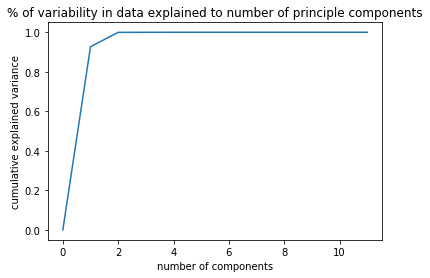

In [7]:

data = np.insert(sc_pca.explained_variance_ratio_, 0, 0)
plt.plot(np.cumsum(data))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("% of variability in data explained to number of principle components")

In [8]:
df_fet_raw.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


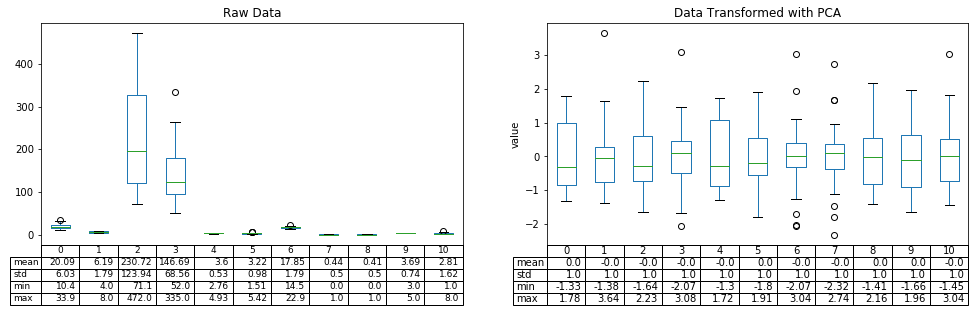

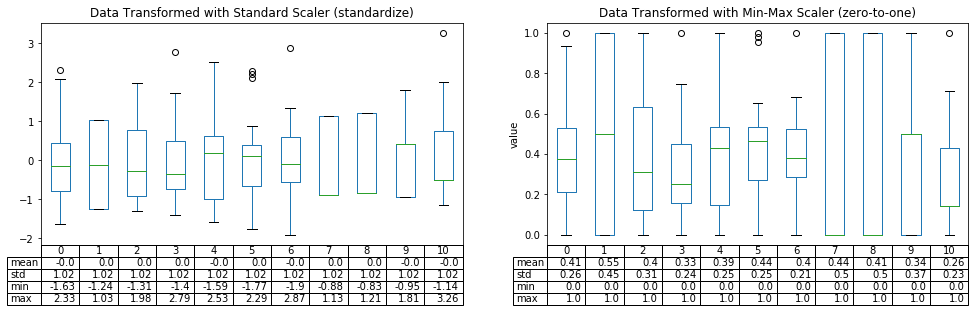

In [9]:
import pandas.plotting as plotting

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plt.subplots_adjust(top=0.97, bottom=0.2, left=0.05, right=0.97, hspace=0.2)

# Raw data
df_fet_raw.plot.box(ax=axes[0], title='Raw Data', 
                    table=np.round(df_fet_raw.describe().T[['mean','std','min','max']].T, 2))
axes[0].get_xaxis().set_visible(False)
plt.xlabel('features')
plt.ylabel('value')

# PCA-Transformed
df_fet_pca.plot.box(ax=axes[1], title='Data Transformed with PCA', 
                    table=np.round(df_fet_pca.describe().T[['mean','std','min','max']].T, 2))
axes[1].get_xaxis().set_visible(False)
plt.xlabel('features')
plt.ylabel('value')

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plt.subplots_adjust(top=0.97, bottom=0.2, left=0.05, right=0.97, hspace=0.2)

# Standardized Scaled
df_fet_sd.plot.box(ax=axes[0], title='Data Transformed with Standard Scaler (standardize)', 
                    table=np.round(df_fet_sd.describe().T[['mean','std','min','max']].T, 2))
axes[0].get_xaxis().set_visible(False)
plt.xlabel('features')
plt.ylabel('value')



# Min-Max Scaled
df_fet_mm.plot.box(ax=axes[1], title='Data Transformed with Min-Max Scaler (zero-to-one)', 
                    table=np.round(df_fet_mm.describe().T[['mean','std','min','max']].T, 2))
axes[1].get_xaxis().set_visible(False)
plt.xlabel('features')
plt.ylabel('value')

plt.show()

# Clustering

## Determine number of clusters

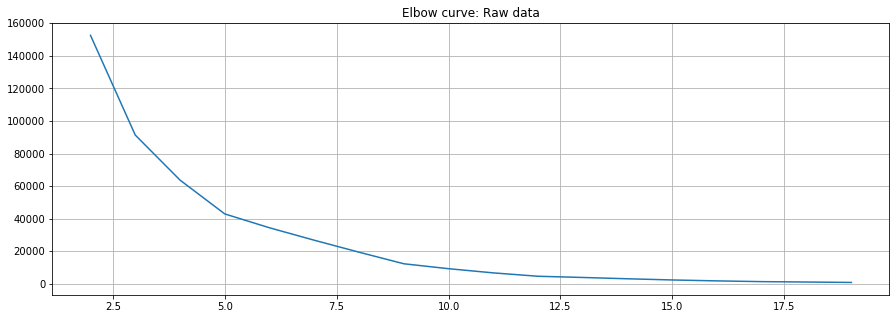

In [10]:
def find_elbow(X, feature_set=''):
    distorsions = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        distorsions.append(kmeans.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), distorsions)
    plt.grid(True)
    plt.title('Elbow curve: ' + feature_set)

find_elbow(X_raw, "Raw data")

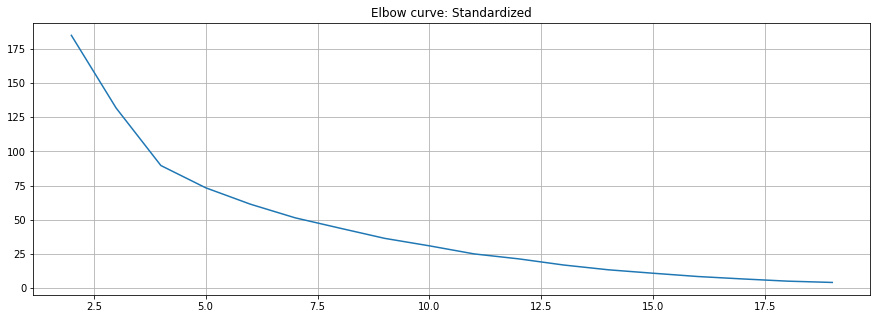

In [11]:
find_elbow(X_scaled_sd, "Standardized")

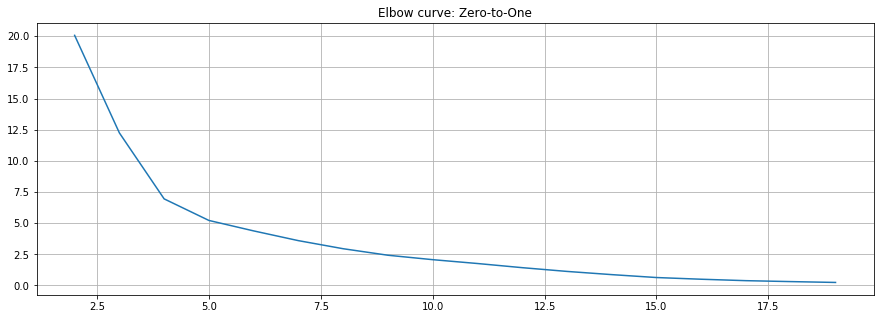

In [12]:
find_elbow(X_scaled_mm, "Zero-to-One")

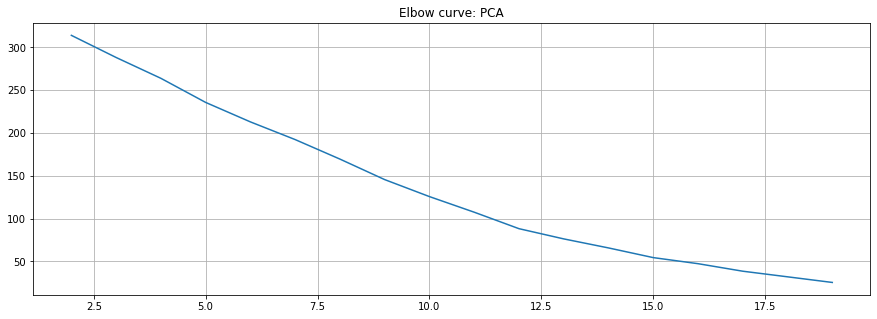

In [13]:
find_elbow(X_scaled_pca, "PCA")

## Fit

In [14]:
# Fit with standardize X

X = X_scaled_sd

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
kmeans.cluster_centers_

array([[-0.84973026,  1.0311213 ,  1.04023395,  0.70357152, -0.90398455,
         0.92086127, -0.40155205, -0.8819171 , -0.82717019, -0.94672926,
         0.17036091],
       [ 0.10995093, -0.59429158, -0.4558493 , -0.66008619, -0.05047429,
        -0.02384543,  1.20445309,  1.13389342, -0.82717019, -0.15983741,
        -0.42122204],
       [-0.26814179,  0.34844789, -0.06002187,  0.77223071,  0.45498114,
        -0.22454755, -1.26947304, -0.8819171 ,  1.20894105,  1.25656793,
         1.50179697],
       [ 1.34597694, -1.24445674, -1.12396912, -0.96042606,  1.11577861,
        -1.22008494,  0.34185228,  0.8819171 ,  1.20894105,  0.77459667,
        -0.82559519]])

In [15]:
kmeans.score(X)

labels = kmeans.labels_

kmeans.labels_

X_kmeans = kmeans.transform(X)
# cols = ['pc%s' % i for i in range(1,len(pca.explained_variance_)+1)]
kmeans_df = pd.DataFrame(data = X_kmeans) # , columns = cols)
kmeans_df['car'] = df['model']
kmeans_df.tail()

,0,1,2,3,car
27,6.556694,4.217380,4.543009,1.814490,Lotus Europa
28,4.551235,5.983349,2.130695,5.853747,Ford Pantera L
29,4.880088,5.110306,1.253984,4.700172,Ferrari Dino
30,5.375711,7.188302,3.113988,7.529665,Maserati Bora
31,5.325338,2.643181,4.153534,1.540402,Volvo 142E


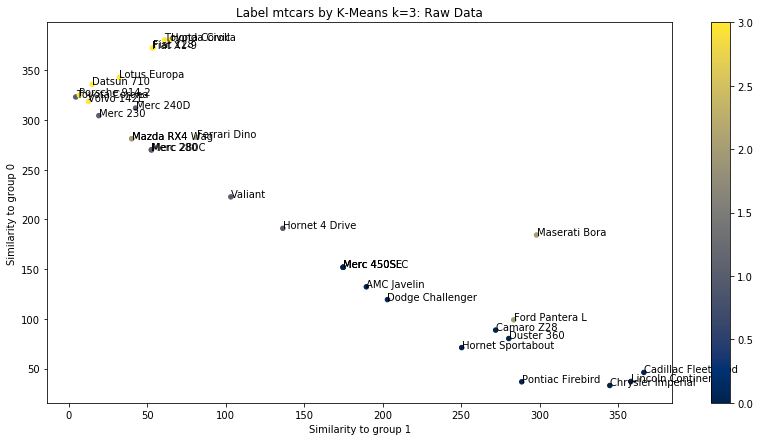

In [16]:
# Plot with annotation
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe/15911372#15911372

def show_cluster(X, n_clusters=4, feature_method=""):
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(X)
    X_kmeans = kmeans.transform(X)
    kmeans_df = pd.DataFrame(data = X_kmeans) # , columns = cols)
    kmeans_df['car'] = df['model']
    kmeans_df['label'] = kmeans.labels_
    fig, ax = plt.subplots(figsize=(14,7))
    ax = kmeans_df[[0,1]].plot.scatter(x=0,y=1,c=labels,colormap='cividis', ax=ax)
    kmeans_df[[0,1,'car']].apply(lambda row: ax.text(*row),axis=1);
    plt.title('Label mtcars by K-Means k=%s: %s' % (n_clusters, feature_method))
    plt.ylabel('Similarity to group 0')
    plt.xlabel('Similarity to group 1')
    kmeans_df['method'] = feature_method
    return kmeans_df

df_res_raw_k3 = show_cluster(X_raw, n_clusters=3, feature_method="Raw Data")

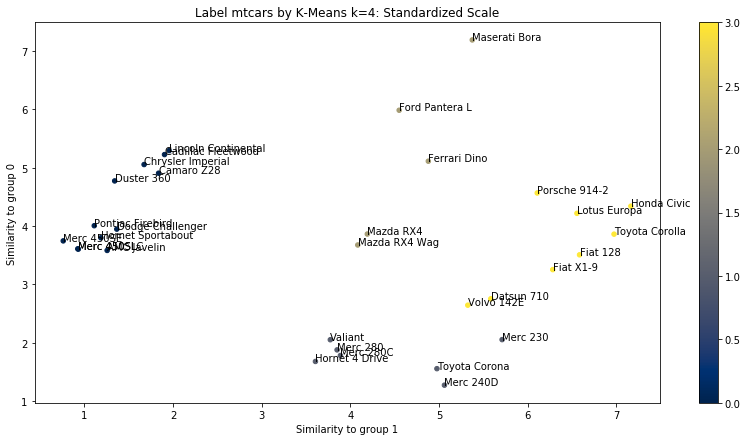

In [17]:

df_res_sd_k4 = show_cluster(X_scaled_sd, n_clusters=4, feature_method="Standardized Scale")

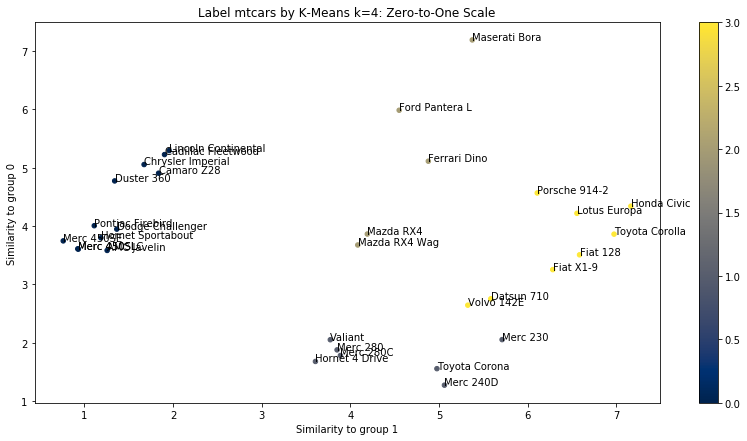

In [18]:
df_res_mm_k4 = show_cluster(X_scaled_sd, n_clusters=4, feature_method="Zero-to-One Scale")

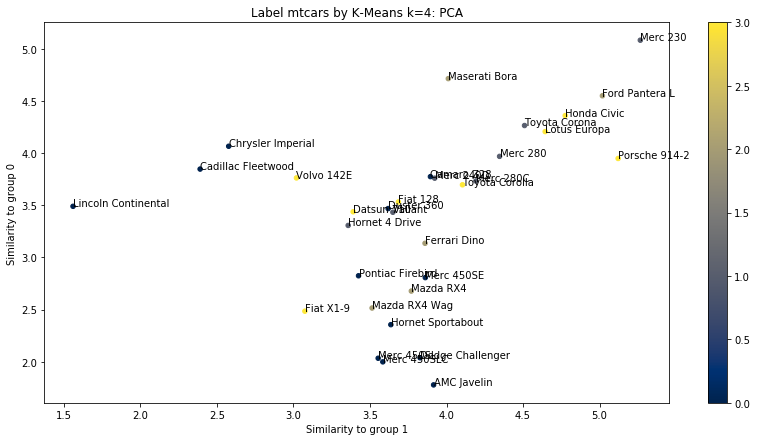

In [21]:
df_res_pca_k4 = show_cluster(X_scaled_pca, n_clusters=4, feature_method="PCA")

In [25]:
# Construct pivot table for presentation

df = pd.concat([df_res_raw_k3, df_res_sd_k4, df_res_mm_k4, df_res_pca_k4])

df = df[['car','label','method']]
df = df.set_index('car')
df

,label,method
car,,
Mazda RX4,0,Raw Data
Mazda RX4 Wag,0,Raw Data
Datsun 710,0,Raw Data
Hornet 4 Drive,3,Raw Data
Hornet Sportabout,1,Raw Data
...,...,...
Lotus Europa,2,PCA
Ford Pantera L,1,PCA
Ferrari Dino,1,PCA


In [26]:
ptable = df.pivot_table(index='car', columns=['method'])
ptable

label                                              
method                PCA Raw Data Standardized Scale Zero-to-One Scale
car                                                                    
AMC Javelin             1        3                  0                 0
Cadillac Fleetwood      0        1                  0                 0
Camaro Z28              3        2                  0                 0
Chrysler Imperial       0        1                  0                 0
Datsun 710              2        0                  3                 3
Dodge Challenger        1        3                  0                 0
Duster 360              3        2                  0                 0
Ferrari Dino            1        0                  2                 2
Fiat 128                2        0                  3                 3
Fiat X1-9               2        0                  3                 3
Ford Pantera L          1        2                  2                 2
Honda Civic             2        0                  3                 3
Hornet 4 Drive          2        3                  1                 1
Hornet Sportabout       1        1                  0                 0
Lincoln Continental     0        1                  0                 0
Lotus Europa            2        0                  3                 3
Maserati Bora           0        2                  2                 2
Mazda RX4               1        0                  2                 2
Mazda RX4 Wag           1        0                  2                 2
Merc 230                2        0                  1                 1
Merc 240D               2        0                  1                 1
Merc 280                2        0                  1                 1
Merc 280C               2        0                  1                 1
Merc 450SE              1        3                  0                 0
Merc 450SL              1        3                  0                 0
Merc 450SLC             1        3                  0                 0
Pontiac Firebird        2        1                  0                 0
Porsche 914-2           1        0                  3                 3
Toyota Corolla          2        0                  3                 3
Toyota Corona           3        0                  1                 1
Valiant                 2        3                  1                 1
Volvo 142E              0        0                  3                 3